In [1]:
import sqlite3

# Create a SQLite database in memory or save to file
conn = sqlite3.connect('sales_data.db')  # This will be saved in Colab's environment
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
cursor.executemany('''
    INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
''', [
    ('Apples', 10, 2.5),
    ('Bananas', 15, 1.8),
    ('Oranges', 8, 3.0),
    ('Grapes', 12, 2.2),
    ('Bananas', 10, 1.8),
    ('Apples', 5, 2.5),
    ('Oranges', 10, 3.0)
])

conn.commit()


Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         25     45.0
2   Grapes         12     26.4
3  Oranges         18     54.0


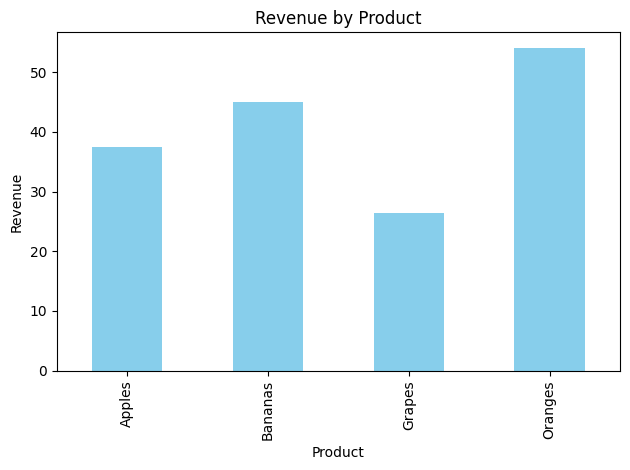

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL query
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Read query results into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print the results
print("Sales Summary:")
print(df)

# Plot the revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
